In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [20]:

# Simulated seat grid and NFL attendance dataset logic
rows, cols = 12, 30
sections = ['A', 'B', 'C']
section_col_map = {'A': range(0, 10), 'B': range(10, 20), 'C': range(20, 30)}

# Step 1: Generate Random Crowd Data
# Simulate features such as match time and importance for each seat
data = []
for section in sections:
    for row in range(rows):
        for col in section_col_map[section]:
            match_time = np.random.choice(['morning', 'evening'])
            importance = np.random.choice(['low', 'high'])
            crowded = 1 if (section == 'B' and match_time == 'evening') or importance == 'high' else 0
            data.append([section, row, col, match_time, importance, crowded])

df = pd.DataFrame(data, columns=['section', 'row', 'col', 'match_time', 'importance', 'crowded'])
df

,section,row,col,match_time,importance,crowded
0,A,0,0,morning,high,1
1,A,0,1,morning,low,0
2,A,0,2,morning,high,1
3,A,0,3,evening,low,0
4,A,0,4,evening,low,0
...,...,...,...,...,...,...
355,C,11,25,morning,high,1
356,C,11,26,morning,high,1
357,C,11,27,evening,high,1
358,C,11,28,evening,low,0


In [21]:

# Step 2: Encode categorical features
df_encoded = pd.get_dummies(df, columns=['section', 'match_time', 'importance'])

# Step 3: Train a simple classifier
X = df_encoded.drop(columns=['crowded'])
y = df_encoded['crowded']
df_encoded

,row,col,crowded,section_A,section_B,section_C,match_time_evening,match_time_morning,importance_high,importance_low
0,0,0,1,True,False,False,False,True,True,False
1,0,1,0,True,False,False,False,True,False,True
2,0,2,1,True,False,False,False,True,True,False
3,0,3,0,True,False,False,True,False,False,True
4,0,4,0,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
355,11,25,1,False,False,True,False,True,True,False
356,11,26,1,False,False,True,False,True,True,False
357,11,27,1,False,False,True,True,False,True,False
358,11,28,0,False,False,True,True,False,False,True


Accuracy: 1.0000


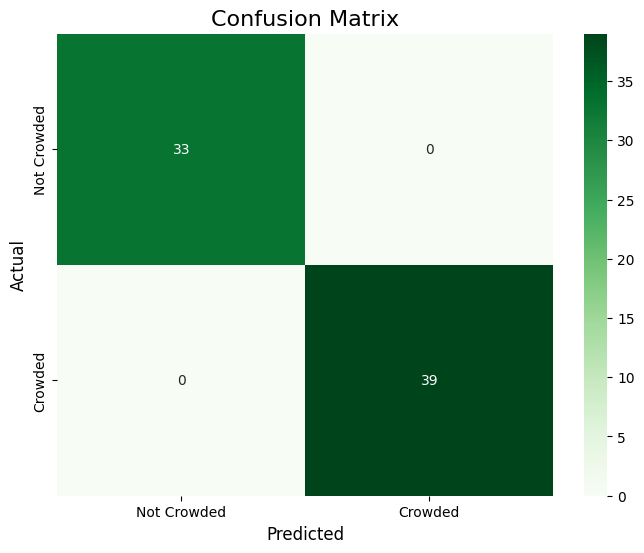

In [27]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
acc = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

# Print Accuracy and Confusion Matrix
print(f"Accuracy: {acc:.4f}")
# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size for better readability
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Crowded', 'Crowded'], yticklabels=['Not Crowded', 'Crowded'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()



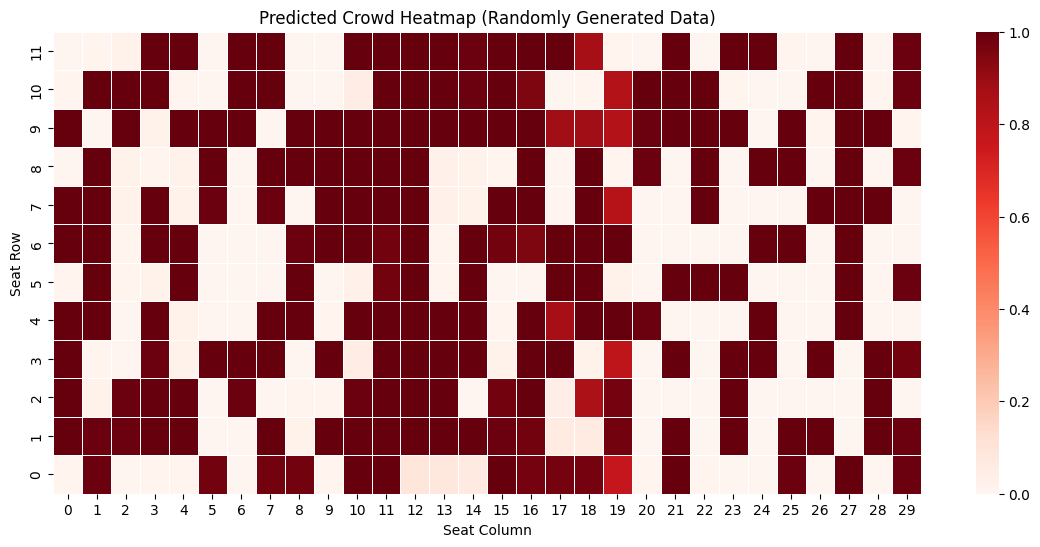

In [28]:
# Step 5: Generate random crowd density and predict using the model
# Generate random values for crowd prediction (e.g., between 0 and 1)
heatmap_grid = np.zeros((rows, cols))
for row in range(rows):
    for col in range(cols):
        section = next(s for s, rng in section_col_map.items() if col in rng)
        # Random values for match_time and importance to simulate randomness
        match_time = np.random.choice(['morning', 'evening'])
        importance = np.random.choice(['low', 'high'])

        # Encode the random values like we did for the model training
        input_df = pd.DataFrame([{
            'row': row,
            'col': col,
            'section_A': int(section == 'A'),
            'section_B': int(section == 'B'),
            'section_C': int(section == 'C'),
            'match_time_evening': 1 if match_time == 'evening' else 0,
            'match_time_morning': 1 if match_time == 'morning' else 0,
            'importance_high': 1 if importance == 'high' else 0,
            'importance_low': 1 if importance == 'low' else 0,
        }])

        # Use the trained model to predict the probability of crowding
        heatmap_grid[row, col] = model.predict_proba(input_df)[0][1]  # probability of being crowded

# Step 6: Visualize the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_grid, cmap='Reds', linewidths=0.5)
plt.title('Predicted Crowd Heatmap (Randomly Generated Data)')
plt.xlabel('Seat Column')
plt.ylabel('Seat Row')
plt.gca().invert_yaxis()
plt.show()